In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib notebook

In [278]:
time_step='1h'

TGBT2=pd.read_csv('D:/GN/REDD/Teste_Green_ER_Limpo_SF_mod3/'+time_step+'/TGBT2/building_1/channel_'+channel+'.csv',sep=';',
                 header=None)

In [279]:
TGBT2

0          1
0     2017-01-01 00:00:00  59.379262
1     2017-01-01 01:00:00  58.421548
2     2017-01-01 02:00:00  58.391568
3     2017-01-01 03:00:00  56.984433
4     2017-01-01 04:00:00  58.412000
...                   ...        ...
8756  2017-12-31 20:00:00  59.300062
8757  2017-12-31 21:00:00  56.465810
8758  2017-12-31 22:00:00  58.876821
8759  2017-12-31 23:00:00  57.182929
8760  2018-01-01 00:00:00  64.771714

[8761 rows x 2 columns]

In [280]:
list=pd.read_csv('D:/GN/REDD/Teste_Green_ER_Limpo_SF_mod3/'+time_step+'/TGBT2/building_1/labels.csv',sep=';')


In [281]:
A=[]
for i in range(len(list)):
    a=pd.read_csv('D:/GN/REDD/Teste_Green_ER_Limpo_SF_mod3/'+time_step+'/TGBT2/building_1/channel_'+str(list['ID'][i])+'.csv',sep=';',
                 header=None)
    A.append(a)

In [282]:
def preplot(df):
    df.columns=['Date','Power']
    df['Date']=pd.to_datetime(df.Date,dayfirst=True)
    df = df.set_index('Date')
    return df

In [283]:
TGBT2=preplot(A[0])
AIR_COMPRESSOR=preplot(A[1])
CROUS=preplot(A[2])
Fantome=preplot(A[3])
TD_GF=preplot(A[4])

In [284]:
list

ID            Name
0   1  Total_building
1   2  AIR_COMPRESSOR
2   3           CROUS
3   4         Fantome
4   5           TD-GF

In [285]:
TGBT2

Power
Date                          
2017-01-01 00:00:00  59.379262
2017-01-01 01:00:00  58.421548
2017-01-01 02:00:00  58.391568
2017-01-01 03:00:00  56.984433
2017-01-01 04:00:00  58.412000
...                        ...
2017-12-31 20:00:00  59.300062
2017-12-31 21:00:00  56.465810
2017-12-31 22:00:00  58.876821
2017-12-31 23:00:00  57.182929
2018-01-01 00:00:00  64.771714

[8761 rows x 1 columns]

In [286]:
def plot(df,color):
    plt.figure()
    plt.plot(df.index,df['Power'],color=color)
    plt.xlabel('Date')
    plt.ylabel('Power [kW]')
    plt.grid(True)
    plt.ylim(bottom=0)
    #plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


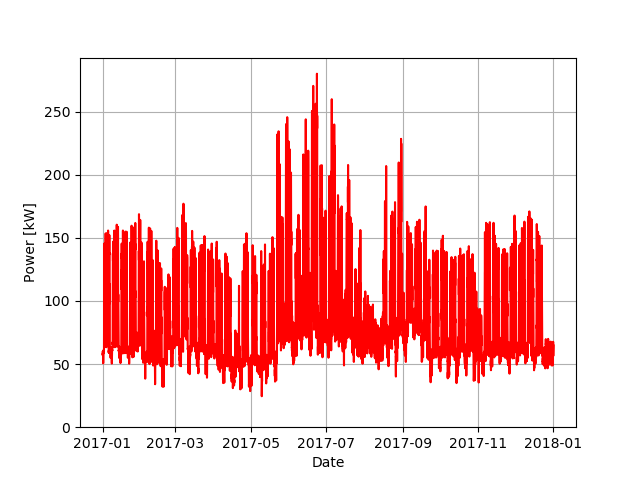

In [287]:
plot(TGBT2,'r')

<IPython.core.display.Javascript object>


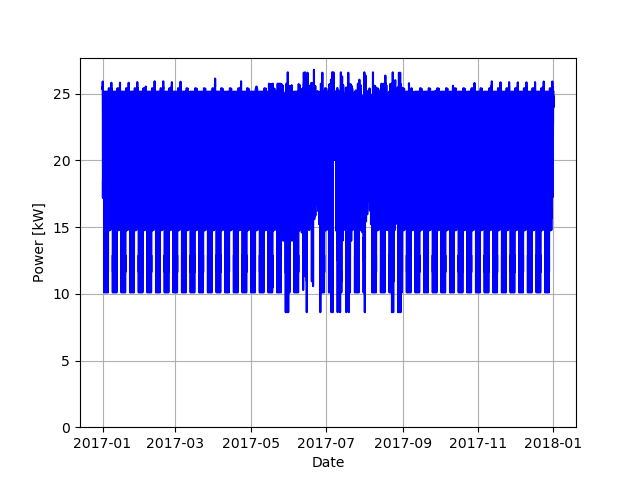

In [288]:
plot(AIR_COMPRESSOR,'b')

<IPython.core.display.Javascript object>


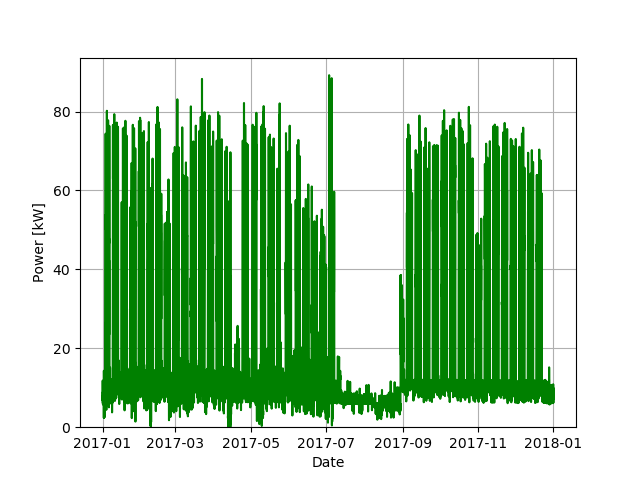

In [289]:
plot(CROUS,'G')

<IPython.core.display.Javascript object>


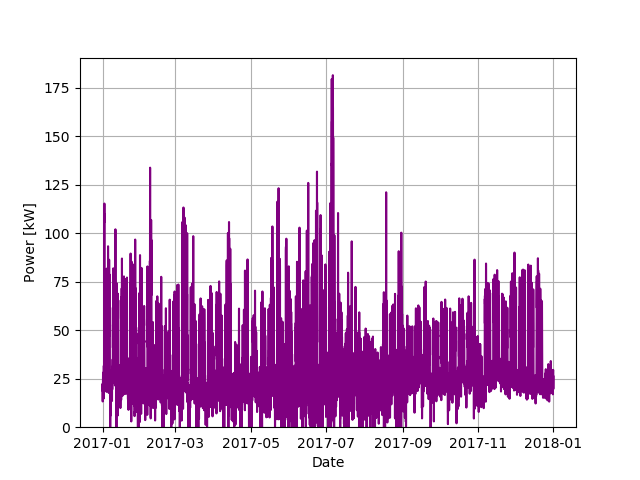

In [290]:
plot(Fantome,'purple')

<IPython.core.display.Javascript object>


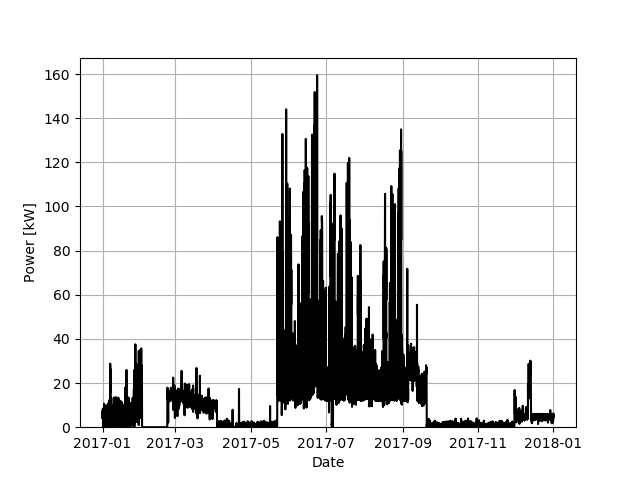

In [291]:
plot(TD_GF,'black')

In [292]:
for i in range(len(A)):
    print(A[i].mean())

Power    83.041219
dtype: float64
Power    21.794332
dtype: float64
Power    17.056772
dtype: float64
Power    31.209589
dtype: float64
Power    12.980525
dtype: float64


In [69]:
len(A)

5

In [71]:
list

ID            Name
0   1  Total_building
1   2  AIR_COMPRESSOR
2   3           CROUS
3   4         Fantome
4   5           TD-GF

In [293]:
from scipy import signal
import numpy as np
import random

In [329]:
duty1=[]
for i in range(len(r)):
    D=random.uniform(0.8,1)
    duty1.append(D)

In [330]:
duty1

[0.806731894035024,
 0.9277757177291648,
 0.8867669281257751,
 0.9955060893871455,
 0.981429183809711,
 0.9720069482403046,
 0.8120188181280326,
 0.9239341822976178,
 0.8132370520603026,
 0.9411125777141361,
 0.8264364054009089,
 0.8501313236072716,
 0.8261533300634608,
 0.9899309256535751,
 0.9665398719791796,
 0.911424356989412,
 0.9879733460014639,
 0.9879922876988414,
 0.8670233394422071,
 0.9958688915663525,
 0.9373746969812158,
 0.880226836163851,
 0.8480474807602452,
 0.9764945616676558,
 0.8625398411381315,
 0.9109427540163051,
 0.915210776733061,
 0.960465017094934,
 0.894490398236111,
 0.8858755121510188,
 0.9213829501848187,
 0.846569894703521,
 0.9430278785980608,
 0.9680816074191414,
 0.8973140680851702,
 0.957509082070799,
 0.8757736974887539,
 0.9128960418607333,
 0.8807568193110396,
 0.8960625445875737,
 0.8438940050208835,
 0.9890915782752299,
 0.830283035845647,
 0.8357460142215802,
 0.8951954079486241,
 0.8916940798169296,
 0.9559143517106928,
 0.8457687846883291,
 0

In [262]:
min(duty1)

0.30000881575980354

In [1]:
def white_noise(rho, sr, n, mu=0):
    sigma = rho * np.sqrt(sr/2)
    noise = np.random.normal(mu, sigma, n)
    return noise

def ac_sint(time_step):
    dti = pd.date_range(start="2017-01-01", end="2018-01-01", freq=time_step)
    r=pd.DataFrame(dti)
    r.columns=['Date']
    r['Date']=pd.to_datetime(r.Date,dayfirst=True)
    r = r.set_index('Date')
    
    if time_step=='T':
        t4=1
    elif time_step=='10T':
        t4=10
    elif time_step=='1h':
        t4=60       
    t5=int((60/t4)*24*7*2)
    
    
    Y=[]
    for i in range(int(len(r)/10)):  
        A1=[]
        dur=random.randint(5,10)
#print(dur)
#for i in range(10):
        for i in range(dur):
            a=1
            A1.append(a)
        for i in range(10-dur):
            a=0
            A1.append(a)
        Y.append(A1)
    Y = [y for x in Y for y in x]
    Y.append(0)    
        
    Y1=[]
    for i in range(math.ceil(t5/10)):  
        A1=[]
        dur=random.randint(0,5)
#print(dur)
#for i in range(10):
        for i in range(dur):
            a=1
            A1.append(a)
        for i in range(10-dur):
            a=0
            A1.append(a)
        Y1.append(A1)
    Y1 = [y for x in Y1 for y in x]
    Y1=Y1[:t5]
    
    r['State']=Y
    #r['State_1']=r['State']
    r['State'].iloc[-t5:]=Y1
    r.loc[r['State']==0,'Value'] = 0
    r.loc[r['State']==1,'Value'] = 60
    
    
    #Generate Noise
    rho = 1 
    sr = 1.5
    n = len(r)
    noise = white_noise(rho, sr, n)
    
    r['NValue']=r['Value']+noise
    return(r)

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
oi=ac_sint('1h')

In [24]:
time_step='1h'
if time_step=='T':
    t4=1
elif time_step=='10T':
    t4=10
elif time_step=='1h':
    t4=60       
t5=int((60/t4)*24*7*2)
Y1=[]
for i in range(((math.ceil(t5/10)))):  
    A1=[]
    dur=random.randint(0,5)
#print(dur)
#for i in range(10):
    for i in range(dur):
        a=1
        A1.append(a)
    for i in range(10-dur):
        a=0
        A1.append(a)
    Y1.append(A1)
Y1 = [y for x in Y1 for y in x]
Y1=Y1[:t5]


In [25]:
oi

State  Value     NValue
Date                                        
2017-01-01 00:00:00      1   23.4  23.605610
2017-01-01 01:00:00      1   23.4  23.074313
2017-01-01 02:00:00      1   23.4  22.817827
2017-01-01 03:00:00      1   23.4  23.396306
2017-01-01 04:00:00      1   23.4  22.965833
...                    ...    ...        ...
2017-12-31 20:00:00      1   23.4  22.558690
2017-12-31 21:00:00      0    5.4   6.055715
2017-12-31 22:00:00      0    5.4   4.529221
2017-12-31 23:00:00      0    5.4   6.585399
2018-01-01 00:00:00      0    5.4   5.553935

[8761 rows x 3 columns]

<IPython.core.display.Javascript object>


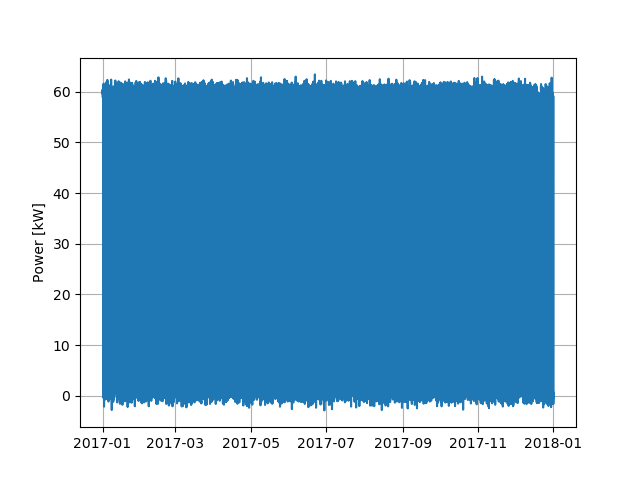

Text(0, 0.5, 'Power [kW]')

In [4]:
%matplotlib notebook
plt.figure()
plt.plot(oi.index,oi['NValue'])
plt.grid(True)
plt.ylabel('Power [kW]')

